In [1]:
import pandas as pd

# Correctly format the file path
file_path = "C:\\Users\\user\\Desktop\\Healthcare\\healthcare dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows and dataset info
print(data.head())
print(data.info())


            Name  Patient_ID  Age  Gender Blood Type Medical Condition  \
0  Bobby JacksOn        3806   30    Male         B-            Cancer   
1   LesLie TErRy        9908   62    Male         A+           Obesity   
2    DaNnY sMitH        9616   76  Female         A-           Obesity   
3   andrEw waTtS        2824   28  Female         O+          Diabetes   
4  adrIENNE bEll        4295   43  Female        AB+            Cancer   

  Admission Type   Medication  Test Results Admission Date Discharge Date  \
0         Urgent  Paracetamol        Normal     01-12-2024     16-12-2025   
1      Emergency    Ibuprofen  Inconclusive     12-12-2024     27-12-2024   
2      Emergency      Aspirin        Normal     22-09-2022     22-09-2022   
3       Elective    Ibuprofen      Abnormal     18-11-2020     18-11-2020   
4         Urgent   Penicillin      Abnormal     19-09-2022     21-09-2022   

  Scheduled Date                    Hospital  Billing Amount  \
0     16-01-2025            

In [2]:
# View basic information about the dataset
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

# Check unique values in each column
print(data.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               2110 non-null   object
 1   Patient_ID         2110 non-null   int64 
 2   Age                2110 non-null   int64 
 3   Gender             2110 non-null   object
 4   Blood Type         2110 non-null   object
 5   Medical Condition  2110 non-null   object
 6   Admission Type     2110 non-null   object
 7   Medication         2110 non-null   object
 8   Test Results       2110 non-null   object
 9   Admission Date     2110 non-null   object
 10  Discharge Date     2110 non-null   object
 11  Scheduled Date     2110 non-null   object
 12  Hospital           2110 non-null   object
 13  Billing Amount     2110 non-null   int64 
 14  Email              2110 non-null   object
 15  Contact Number     2110 non-null   int64 
dtypes: int64(4), object(12)
memory usage: 263.

In [3]:
# Checking for missing values
print(data.isnull().sum())
data = data.dropna()

# Checking for duplicate rows
print(data.duplicated().sum())
data = data.drop_duplicates()

Name                 0
Patient_ID           0
Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Admission Type       0
Medication           0
Test Results         0
Admission Date       0
Discharge Date       0
Scheduled Date       0
Hospital             0
Billing Amount       0
Email                0
Contact Number       0
dtype: int64
0


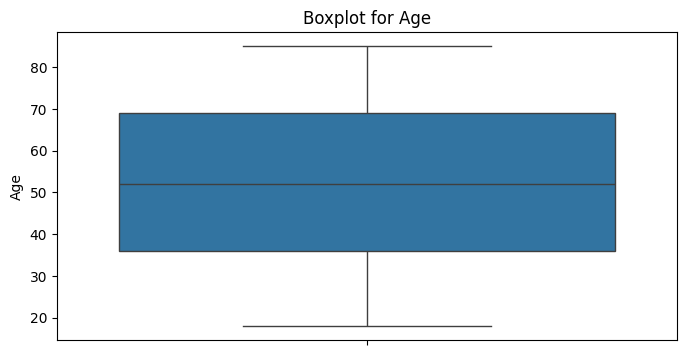

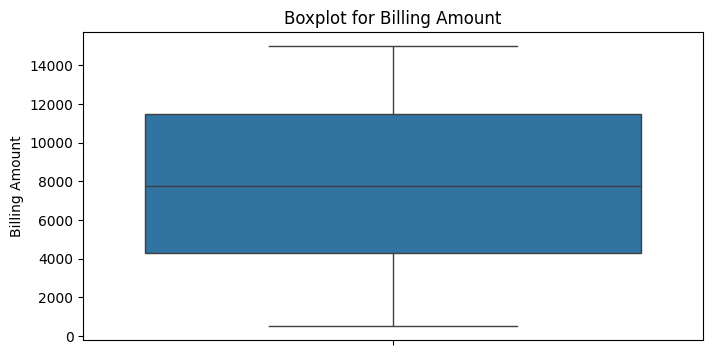

Outliers have been handled for the specified columns.


In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to process
numerical_columns = ['Age', 'Billing Amount']  # Replace with your column names

# Iterate over each column to handle outliers
for col in numerical_columns:
    # Visualize outliers using a boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

    # Handle outliers using IQR (interquartile range method
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the dataset to remove outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Print a message after processing
print("Outliers have been handled for the specified columns.")


In [5]:
# Check data types of all columns
print(data.dtypes)

# Convert multiple date-related columns to datetime format
date_columns = ['Admission Date', 'Discharge Date', 'Scheduled Date']  # Replace with actual column names in your dataset
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime format, handle invalid parsing with NaT

# Convert multiple numerical columns to numeric type
numeric_columns = ['Age', 'Billing Amount']  # Replace with actual column names in your dataset
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, handle errors with NaN

# Print dataset info after conversions
print(data.info())


Name                 object
Patient_ID            int64
Age                   int64
Gender               object
Blood Type           object
Medical Condition    object
Admission Type       object
Medication           object
Test Results         object
Admission Date       object
Discharge Date       object
Scheduled Date       object
Hospital             object
Billing Amount        int64
Email                object
Contact Number        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               2110 non-null   object        
 1   Patient_ID         2110 non-null   int64         
 2   Age                2110 non-null   int64         
 3   Gender             2110 non-null   object        
 4   Blood Type         2110 non-null   object        
 5   Medical Condition  2110 non-null   object

C:\Users\user\AppData\Local\Temp\ipykernel_13772\728089669.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime format, handle invalid parsing with NaT
C:\Users\user\AppData\Local\Temp\ipykernel_13772\728089669.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime format, handle invalid parsing with NaT


In [6]:
# Update the Name column to capitalize the first letter of each name
data['Name'] = data['Name'].str.title()

# Display the first few rows to confirm the changes
print(data[['Name']].head())


            Name
0  Bobby Jackson
1   Leslie Terry
2    Danny Smith
3   Andrew Watts
4  Adrienne Bell


In [7]:
data['Length of Stay'] = (data['Discharge Date'] - data['Admission Date']).dt.days


In [ ]:
# Save the cleaned dataset to a new file
data.to_csv("cleaned_healthcare_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


: 

In [ ]:
import mysql.connector

# Connect to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Change if using a remote server
    user="root",  # Replace with your MySQL username
    password="702280Dhruvp@",  # Replace with your MySQL password
    database="healthcare"  # Replace with your database name
)

print("Connected to MySQL database")
cursor = db_connection.cursor()


In [ ]:
for index, row in data.iterrows():
    cursor.execute("""
        INSERT INTO Patients (Patient_ID, Name, Age, Gender, BloodType)
        VALUES (%s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE Name=VALUES(Name);
    """, (
        row['Patient_ID'], row['Name'], row['Age'], row['Gender'], row['Blood Type']
    ))
db_connection.commit()


In [ ]:
for index, row in data.iterrows():
    cursor.execute("""
        INSERT INTO MedicalConditions (Medical_Condition, Patient_ID, Admission_Type, Medication, Test_Results)
        VALUES (%s, %s, %s, %s, %s)
    """, (
        row['Medical Condition'],
        row['Patient_ID'],
        row['Admission Type'],
        row['Medication'],
        row['Test Results']
    ))
db_connection.commit()


In [ ]:
for index, row in data.iterrows():
    cursor.execute("""
        INSERT INTO Admissions (Admission_Type, Patient_ID, Admission_Date, Discharge_Date, Scheduled_Date, Hospital, Billing_Amount)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Admission Type'],
        row['Patient_ID'],
        row['Admission Date'],
        row['Discharge Date'],
        row['Scheduled Date'],
        row['Hospital'],
        row['Billing Amount']
    ))
db_connection.commit()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting plot size
plt.figure(figsize=(5, 5))

# Count plot for 'Gender' with hue set to 'Gender' (to maintain the same effect as palette)
sns.countplot(x='Gender', data=data, hue='Gender', palette='Blues', legend=False)
plt.title('Distribution of Gender')  # Title
plt.xlabel('Gender')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Adjusting plot size for the second plot
plt.figure(figsize=(5, 5))

# Count plot for 'Admission Type'
sns.countplot(x='Admission Type', data=data, hue='Admission Type', palette='Blues', legend=False)
plt.title('Distribution of Admission Type')  # Title
plt.xlabel('Admission Type')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [ ]:
# Count plot for 'Gender' vs 'Admission Type' with labels
sns.countplot(x='Gender', hue='Admission Type', data=data)
plt.title('Gender vs Admission Type Distribution')  # Title
plt.xlabel('Gender')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()


In [ ]:
import missingno as msno

# Visualize missing data
msno.bar(data)
plt.show()


In [ ]:
# One-hot encode categorical columns (e.g., Gender, Admission Type, Medical Condition)
data_encoded = pd.get_dummies(data, columns=['Gender', 'Admission Type', 'Medical Condition', 'Blood Type'], drop_first=True)

# Display the first few rows of the encoded data
print(data_encoded.head())


In [ ]:
# Create 'Age Group' based on age ranges
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 40, 60, 100], labels=['Child', 'Adult', 'Senior', 'Elderly'])

# Show the distribution of 'Age Group'
sns.countplot(x='Age Group', data=data)
plt.title('Age Grouping')
plt.show()


In [ ]:
# Ensure the date columns are in datetime format
data['Admission Date'] = pd.to_datetime(data['Admission Date'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Calculate length of stay (in days)
data['Length of Stay'] = (data['Discharge Date'] - data['Admission Date']).dt.days

# Show the distribution of 'Length of Stay'
sns.histplot(data['Length of Stay'], bins=30, kde=True)
plt.title('Length of Stay')
plt.show()


In [ ]:
import pandas as pd
# Correctly format the file path
file_path = "C:\\Users\\user\\Desktop\\Healthcare\\healthcare dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

# Assuming you have a DataFrame `df` with the described columns
# Convert columns to appropriate datetime format if not already done
# Convert Admission Date and Discharge Date to datetime format, specifying the date format
df['Admission Date'] = pd.to_datetime(df['Admission Date'], format='%d-%m-%Y')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y')

# 1. Length of Stay
df['Length of Stay'] = (df['Discharge Date'] - df['Admission Date']).dt.days

# 2. Chronic Conditions
# Example: Let's assume chronic conditions are indicated in the `Medical Condition` column as a comma-separated string
chronic_conditions = ['diabetes', 'hypertension', 'asthma', 'cancer']
for condition in chronic_conditions:
    df[f'Has_{condition.capitalize()}'] = df['Medical Condition'].str.contains(condition, case=False, na=False).astype(int)

# Total Number of Chronic Conditions
df['Total Number of Conditions'] = df[['Has_Diabetes', 'Has_Hypertension', 'Has_Asthma', 'Has_Cancer']].sum(axis=1)

# 3. Age Group
bins = [-float('inf'), 17, 35, 50, 70, float('inf')]
labels = ['<18', '18-35', '36-50', '51-70', '>70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 4. Emergency Admission Flag
df['Emergency Admission'] = (df['Admission Type'] == 'Emergency').astype(int)

# 5. Previous Readmission
# Assuming there is a column `Previous Admissions` that stores past readmissions as a count
df['Previous Readmission'] = (df['Patient_ID'].duplicated(keep=False)).astype(int)

# Review the new features
print(df.head())


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = "C:\\Users\\user\\Desktop\\Healthcare\\healthcare dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

### Step 1: Min-Max Scaling
# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to numeric columns
numeric_columns = ['Age', 'Billing Amount']
df_min_max_scaled = df.copy()
df_min_max_scaled[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

print("Data after Min-Max Scaling:")
print(df_min_max_scaled)

### Step 2: Standardization (Z-score normalization)
# Initialize the Standard Scaler
standard_scaler = StandardScaler()

# Apply Standardization to numeric columns
df_standard_scaled = df.copy()
df_standard_scaled[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

print("\nData after Standardization (Z-score normalization):")
print(df_standard_scaled)
